<a href="https://colab.research.google.com/github/Momin2005-ui/cnn-image-classification-pytorch/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/animal-faces")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: momin9233
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces


100%|██████████| 696M/696M [00:07<00:00, 92.6MB/s]


In [ ]:
import torch
from torch import nn
from torch.optim import Adam
import torchvision.transforms as transform # preprocessing the image
from torch.utils.data import Dataset,DataLoader
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os

device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
image_path=[]
labels=[]

for i in os.listdir("/content/animal-faces/afhq"):
  print(i)
  for label in os.listdir(f"/content/animal-faces/afhq/{i}"):
    print(label)
    for image in os.listdir(f"/content/animal-faces/afhq/{i}/{label}"):
      print(image)
      break
    break
  break

train
dog
pixabay_dog_001635.jpg


In [ ]:
image_path=[]
labels=[]

for i in os.listdir("/content/animal-faces/afhq"):
  for label in os.listdir(f"/content/animal-faces/afhq/{i}"):
    for image in os.listdir(f"/content/animal-faces/afhq/{i}/{label}"):
      image_path.append(f"/content/animal-faces/afhq/{i}/{label}/{image}")
      labels.append(label)

data_df=pd.DataFrame(zip(image_path,labels),columns=['image_path','labels'])
data_df.head()

,image_path,labels
0,/content/animal-faces/afhq/train/dog/pixabay_d...,dog
1,/content/animal-faces/afhq/train/dog/flickr_do...,dog
2,/content/animal-faces/afhq/train/dog/pixabay_d...,dog
3,/content/animal-faces/afhq/train/dog/pixabay_d...,dog
4,/content/animal-faces/afhq/train/dog/pixabay_d...,dog


In [ ]:
# split the data into train , test, validate before itself it was splitted but not into test

train=data_df.sample(frac=0.7)    # for training a sample from df 70%
test=data_df.drop(train.index)    # droping the train data so that remaining part will be saved

val=test.sample(frac=0.5)         # for validation a sample from test 50%
test=test.drop(val.index)         # droping the val data so that remaining part will be saved

print(train.shape)
print(test.shape)
print(val.shape)

(11291, 2)
(2419, 2)
(2420, 2)


In [ ]:
LabelEncoder=LabelEncoder()
LabelEncoder.fit(data_df["labels"])  # like cat tranforms to 0 , dog as 1 like that ....

transform=transform.Compose([
    transform.Resize((128,128)),
    transform.ToTensor(),
    transform.ConvertImageDtype(torch.float)
])  # it makes all the images having same properties like size etc..


In [ ]:
class CustomImageDataset(Dataset):
  def __init__(self,dataframe,transform=None):
    self.dataframe=dataframe
    self.transform=transform
    self.labels=torch.tensor(LabelEncoder.transform(dataframe["labels"])).to(device)

  def __len__(self):
    return self.dataframe.shape[0]

  def __getitem__(self,idx):
    img_path=self.dataframe.iloc[idx,0]
    label=self.labels[idx]
    image=Image.open(img_path).convert('RGB')

    if self.transform:
      image=self.transform(image).to(device)  # tranform above defined

    return image,label

In [ ]:
#creating dataset for training

train_dataset=CustomImageDataset(dataframe=train,transform=transform)
val_dataset=CustomImageDataset(dataframe=val,transform=transform)
test_dataset=CustomImageDataset(dataframe=test,transform=transform)

In [ ]:
train_dataset.__getitem__(2)

(tensor([[[0.5137, 0.5451, 0.5569,  ..., 0.5451, 0.5294, 0.5255],
          [0.5137, 0.5451, 0.5529,  ..., 0.5529, 0.5451, 0.5412],
          [0.5098, 0.5373, 0.5490,  ..., 0.5686, 0.5608, 0.5490],
          ...,
          [0.2667, 0.3529, 0.4784,  ..., 0.2980, 0.2196, 0.2667],
          [0.3333, 0.3804, 0.4235,  ..., 0.3176, 0.2902, 0.2471],
          [0.3804, 0.4118, 0.4784,  ..., 0.2824, 0.2784, 0.3176]],
 
         [[0.5490, 0.5686, 0.5765,  ..., 0.5608, 0.5569, 0.5569],
          [0.5490, 0.5686, 0.5725,  ..., 0.5686, 0.5725, 0.5725],
          [0.5451, 0.5647, 0.5686,  ..., 0.5843, 0.5843, 0.5804],
          ...,
          [0.1961, 0.2980, 0.4510,  ..., 0.2745, 0.1961, 0.2471],
          [0.2627, 0.3255, 0.3961,  ..., 0.2941, 0.2667, 0.2275],
          [0.3176, 0.3608, 0.4471,  ..., 0.2588, 0.2588, 0.2980]],
 
         [[0.4118, 0.4353, 0.4471,  ..., 0.4784, 0.4667, 0.4588],
          [0.4078, 0.4314, 0.4392,  ..., 0.4902, 0.4824, 0.4745],
          [0.3961, 0.4196, 0.4275,  ...,

In [ ]:
LabelEncoder.inverse_transform([0])

array(['cat'], dtype=object)

In [ ]:
# visualise the images

In [ ]:
# lets set our hyper parameters
LR= 1e-4
BATCH_SIZE =16
EPOCHS=10

In [ ]:
# loading the data for training in batch size and particuklarly dataloader only takes pytorch as data not normal numpy array etc

train_loader =DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True)
val_loader=DataLoader(val_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=True)


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1=nn.Conv2d(3,32,kernel_size=3,padding=1)  # paaing is to put another frame sowe dont lose any features
    self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)

    self.pooling=nn.MaxPool2d(2,2)   # reduce the size but not disturbing the features

    self.relu=nn.ReLU()

    self.flatten=nn.Flatten()
    self.linear=nn.Linear((128*16*16),128)  # see the img size after conv3

    self.output =nn.Linear(128,len(data_df['labels'].unique()))

  def forward(self,x):
      # starting with (128x128x128)
      x=self.conv1(x) # (32 x 128 ,128)
      x=self.pooling(x) # (32 x 64 x 64)
      x=self.relu(x)

      x=self.conv2(x) # (64 x 128 ,128)
      x=self.pooling(x) # (64 x 32 x 32)
      x=self.relu(x)

      x=self.conv3(x) # (128 x 32 ,32)
      x=self.pooling(x) # (128 x 16 x 16)
      x=self.relu(x)

      x=self.flatten(x)
      x=self.linear(x)
      x=self.output(x)

      return x

In [ ]:
model=Net().to(device)


In [ ]:
from torchsummary import summary
summary(model,input_size=(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
         MaxPool2d-2           [-1, 32, 64, 64]               0
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
         MaxPool2d-5           [-1, 64, 32, 32]               0
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
         MaxPool2d-8          [-1, 128, 16, 16]               0
              ReLU-9          [-1, 128, 16, 16]               0
          Flatten-10                [-1, 32768]               0
           Linear-11                  [-1, 128]       4,194,432
           Linear-12                    [-1, 3]             387
Total params: 4,288,067
Trainable params: 4,288,067
Non-trainable params: 0
---------------------------

In [ ]:
# before training define loss and optimizer

criterion=nn.CrossEntropyLoss()  # since it is multiclass so cross entropy if it is binary BCE is there
optimizer=Adam(model.parameters(),lr=LR)

In [ ]:
total_loss_train_plot=[]
total_loss_val_plot=[]
total_acc_train_plot=[]
total_acc_val_plot=[]

for epoch in range(EPOCHS):
  total_acc_train=0
  total_loss_train=0
  total_acc_val=0
  total_loss_val=0

  for inputs,labels in train_loader:
    optimizer.zero_grad()

    outputs=model(inputs)

    train_loss=criterion(outputs,labels)

    total_loss_train+=train_loss.item()

    train_loss.backward()   # started backpropagation


    train_acc=(torch.argmax(outputs,axis=1)== labels).sum().item()
    total_acc_train+=train_acc

    optimizer.step()

  with torch.no_grad():
    for inputs,labels in val_loader:
      outputs=model(inputs)

      val_loss=criterion(outputs,labels)
      total_loss_val+=val_loss.item()

      val_acc=(torch.argmax(outputs,axis=1)== labels).sum().item()
      total_acc_val+=val_acc

  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_val_plot.append(round(total_loss_val/1000,4))

  total_acc_train_plot.append(round(total_acc_train/train_dataset.__len__()*100,4))

  print(f'''Epoch {epoch+1} , Train Loss : {round(total_loss_train/1000,4)}  Train Accuracy : {round(total_acc_train/train_dataset.__len__()*100,4)}    Validation Loss {round(total_loss_val/1000,4)}  Validation Accuracy  {round(total_acc_val/val_dataset.__len__(),4)}''')

Epoch 1 , Train Loss : 0.3298  Train Accuracy : 81.0203    Validation Loss 0.0396  Validation Accuracy  0.9083
Epoch 2 , Train Loss : 0.1355  Train Accuracy : 93.0298    Validation Loss 0.0355  Validation Accuracy  0.9149
Epoch 3 , Train Loss : 0.0891  Train Accuracy : 95.244    Validation Loss 0.0249  Validation Accuracy  0.9426
Epoch 4 , Train Loss : 0.0629  Train Accuracy : 96.8825    Validation Loss 0.0271  Validation Accuracy  0.9372
Epoch 5 , Train Loss : 0.0437  Train Accuracy : 97.7947    Validation Loss 0.0215  Validation Accuracy  0.9463
Epoch 6 , Train Loss : 0.0321  Train Accuracy : 98.3881    Validation Loss 0.0176  Validation Accuracy  0.9562
Epoch 7 , Train Loss : 0.023  Train Accuracy : 98.8752    Validation Loss 0.0189  Validation Accuracy  0.9583
Epoch 8 , Train Loss : 0.0173  Train Accuracy : 99.1586    Validation Loss 0.0225  Validation Accuracy  0.9529
Epoch 9 , Train Loss : 0.0117  Train Accuracy : 99.4952    Validation Loss 0.0241  Validation Accuracy  0.9525
Epo

In [ ]:
with torch.no_grad(): # not gonna change weights
  total_loss_test=0
  total_acc_test=0
  for inputs,labels in test_loader:
    predictions=model(inputs)

    acc=(torch.argmax(predictions,axis=1)== labels).sum().item()
    test_loss =criterion(predictions,labels)
    total_loss_test+=test_loss.item()
    total_acc_test+=acc



print(f"""Accuracy Score is : {round(total_acc_test/test_dataset.__len__()*100,4)} and Loss : {round(total_loss_test/1000,4)}""")

Accuracy Score is : 96.1968 and Loss : 0.0221


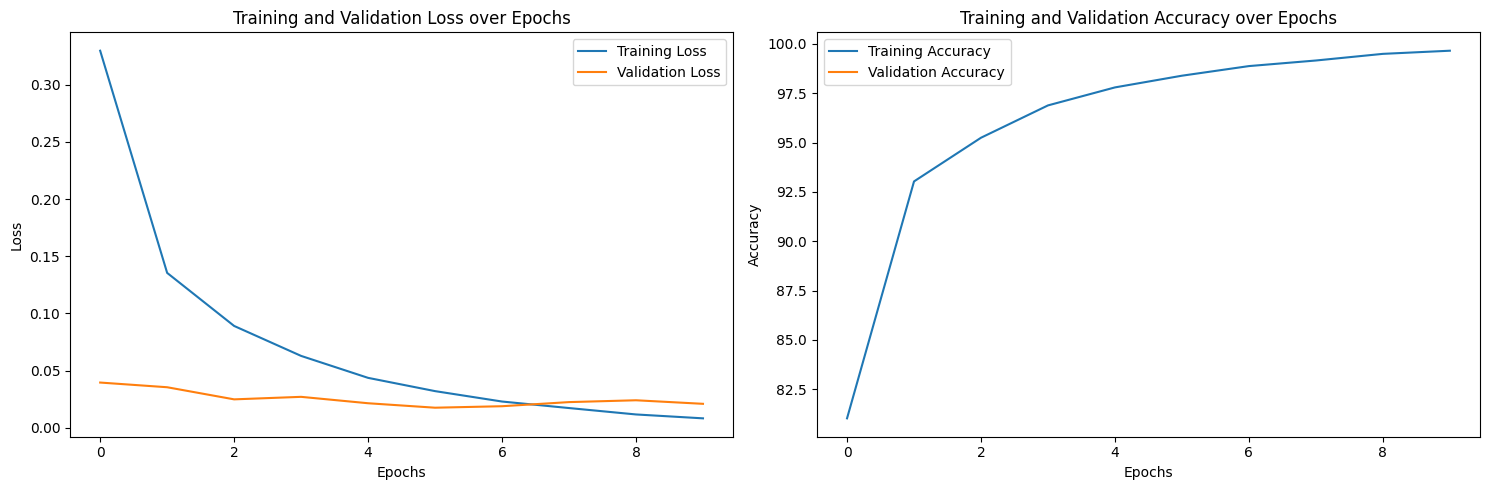

In [ ]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_val_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_val_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()

plt.show()

In [ ]:
# read the image
# transform the image to oue object
# predict through the model
# inverse transform by label model

def predict(image):
  image=Image.open().convert('RGB')
  image=transform(image).to(device)  # tranform above defined
  print(image.shape)
  output=model(image)
  print(output)